In [ ]:
#Explaining a linear regression model

In [ ]:
pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 3.9 MB/s 


In [ ]:
import pandas as pd
df_lin_reg = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00374/energydata_complete.csv')
del df_lin_reg['date']
df_lin_reg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Appliances   19735 non-null  int64  
 1   lights       19735 non-null  int64  
 2   T1           19735 non-null  float64
 3   RH_1         19735 non-null  float64
 4   T2           19735 non-null  float64
 5   RH_2         19735 non-null  float64
 6   T3           19735 non-null  float64
 7   RH_3         19735 non-null  float64
 8   T4           19735 non-null  float64
 9   RH_4         19735 non-null  float64
 10  T5           19735 non-null  float64
 11  RH_5         19735 non-null  float64
 12  T6           19735 non-null  float64
 13  RH_6         19735 non-null  float64
 14  T7           19735 non-null  float64
 15  RH_7         19735 non-null  float64
 16  T8           19735 non-null  float64
 17  RH_8         19735 non-null  float64
 18  T9           19735 non-null  float64
 19  RH_9

In [ ]:
df_lin_reg.columns

Index(['Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4',
       'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9',
       'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility',
       'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

In [ ]:
#y is the dependent variable, that we need to predict
y = df_lin_reg.pop('Appliances')
# X is the set of input features
X = df_lin_reg

In [ ]:
import pandas as pd
import shap
import sklearn

# a simple linear model initialized
model = sklearn.linear_model.LinearRegression()

# linear regression model trained
model.fit(X, y)

LinearRegression()

In [ ]:
print("Model coefficients:\n")
for i in range(X.shape[1]):
    print(X.columns[i], "=", model.coef_[i].round(5))

Model coefficients:

lights = 1.98971
T1 = -0.60374
RH_1 = 15.15362
T2 = -17.70602
RH_2 = -13.48062
T3 = 25.4064
RH_3 = 4.92457
T4 = -3.46525
RH_4 = -0.17891
T5 = -0.02784
RH_5 = 0.14096
T6 = 7.12616
RH_6 = 0.28795
T7 = 1.79463
RH_7 = -1.54968
T8 = 8.14656
RH_8 = -4.66968
T9 = -15.87243
RH_9 = -0.90102
T_out = -10.22819
Press_mm_hg = 0.13986
RH_out = -1.06375
Windspeed = 1.70364
Visibility = 0.15368
Tdewpoint = 5.0488
rv1 = -0.02078
rv2 = -0.02078


Permutation explainer: 19736it [15:22, 21.23it/s]                           


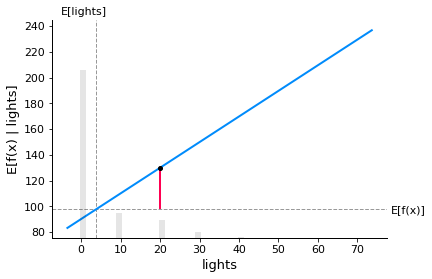

In [ ]:
# compute the SHAP values for the linear model
explainer = shap.Explainer(model.predict, X)

# SHAP value calculation
shap_values = explainer(X)

# make a standard partial dependence plot for lights on predicted output
sample_ind = 20
shap.partial_dependence_plot(
    "lights", model.predict, X, model_expected_value=True,
    feature_expected_value=True, ice=False,
    shap_values=shap_values[sample_ind:sample_ind+1,:]
)

In [ ]:
import numpy as np
pd.DataFrame(np.round(shap_values.values,3)).head(3)

0      1        2       3       4       5       6      7      8   \
0  51.732  1.226  106.376  25.393 -54.975 -72.071  28.015  8.056 -1.153   
1  51.732  1.226   92.687  25.393 -54.065 -72.071  28.311  8.056 -1.229   
2  51.732  1.226   86.727  25.393 -52.773 -72.071  29.017  8.311 -1.211   

      9   ...      17     18      19     20      21     22     23     24  \
0  0.077  ...  45.453 -3.747  16.410 -3.192 -13.351  4.970  4.077  3.832   
1  0.077  ...  44.924 -3.774  17.603 -3.178 -13.351  4.402  3.488  3.327   
2  0.077  ...  45.982 -3.720  18.797 -3.164 -13.351  3.834  2.898  2.822   

      25     26  
0  0.246  0.246  
1  0.135  0.135  
2 -0.074 -0.074  

[3 rows x 27 columns]

In [ ]:
# average prediction value is called as the base value
pd.DataFrame(np.round(shap_values.base_values,3)).head(3)

0
0  97.494
1  97.494
2  97.494

In [ ]:
pd.DataFrame(np.round(shap_values.data,3)).head(3)

0      1       2     3       4      5       6       7       8       9   \
0  30.0  19.89  47.597  19.2  44.790  19.79  44.730  19.000  45.567  17.167   
1  30.0  19.89  46.693  19.2  44.722  19.79  44.790  19.000  45.992  17.167   
2  30.0  19.89  46.300  19.2  44.627  19.79  44.933  18.927  45.890  17.167   

   ...      17     18     19     20    21     22      23   24      25      26  
0  ...  17.033  45.53  6.600  733.5  92.0  7.000  63.000  5.3  13.275  13.275  
1  ...  17.067  45.56  6.483  733.6  92.0  6.667  59.167  5.2  18.606  18.606  
2  ...  17.000  45.50  6.367  733.7  92.0  6.333  55.333  5.1  28.643  28.643  

[3 rows x 27 columns]

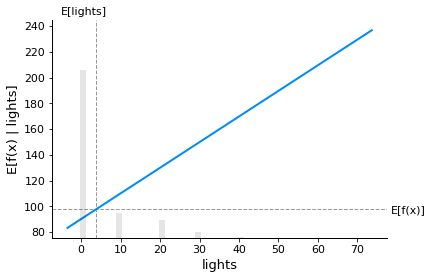

In [ ]:
shap.partial_dependence_plot(
    "lights", model.predict, X, ice=False,
    model_expected_value=True, feature_expected_value=True
)

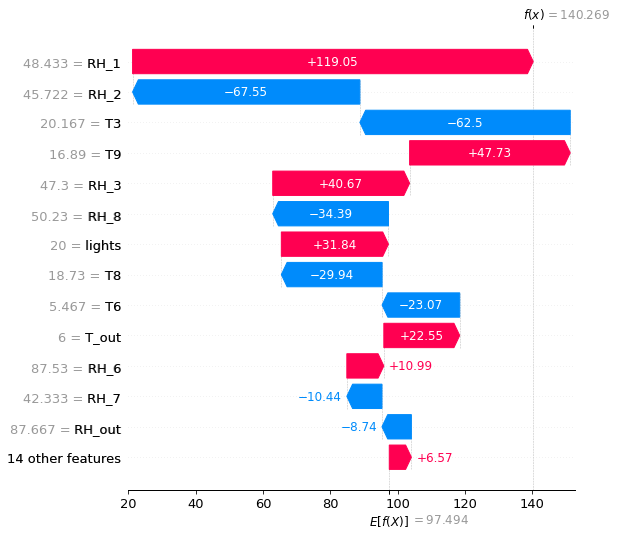

In [ ]:
# the waterfall_plot shows how we get from shap_values.base_values to model.predict(X)[sample_ind]
shap.plots.waterfall(shap_values[sample_ind], max_display=14)

In [ ]:
X[20:21]

lights     T1       RH_1    T2     RH_2         T3  RH_3      T4     RH_4  \
20      20  20.89  48.433333  20.2  45.7225  20.166667  47.3  19.175  49.9475   

           T5  ...     T9       RH_9  T_out  Press_mm_hg     RH_out  \
20  18.066667  ...  16.89  45.126667    6.0   735.266667  87.666667   

    Windspeed  Visibility  Tdewpoint        rv1        rv2  
20        6.0        40.0   4.033333  46.735262  46.735262  

[1 rows x 27 columns]

In [ ]:
model.predict(X[20:21])

array([140.26911466])

In [ ]:
#computing shap importance values for the linear model
import numpy as np
feature_names = shap_values.feature_names
shap_df = pd.DataFrame(shap_values.values, columns=feature_names)
vals = np.abs(shap_df.values).mean(0)
shap_importance = pd.DataFrame(list(zip(feature_names, vals)), columns=['col_name', 'feature_importance_vals'])
shap_importance.sort_values(by=['feature_importance_vals'], ascending=False, inplace=True)

In [ ]:
print(shap_importance)

       col_name  feature_importance_vals
2          RH_1                49.530061
19        T_out                43.828847
4          RH_2                42.911069
5            T3                41.671587
11           T6                34.653893
3            T2                31.097282
17           T9                26.607721
16         RH_8                19.920029
24    Tdewpoint                17.443688
21       RH_out                13.044643
6          RH_3                13.042064
15           T8                12.803450
0        lights                11.907603
12         RH_6                 7.806188
14         RH_7                 6.578015
7            T4                 5.866801
22    Windspeed                 3.361895
13           T7                 3.182072
18         RH_9                 3.041144
23   Visibility                 1.385616
10         RH_5                 0.855398
20  Press_mm_hg                 0.823456
1            T1                 0.765753
8          RH_4 

In [ ]:
X[20:21]

lights     T1       RH_1    T2     RH_2         T3  RH_3      T4     RH_4  \
20      20  20.89  48.433333  20.2  45.7225  20.166667  47.3  19.175  49.9475   

           T5  ...     T9       RH_9  T_out  Press_mm_hg     RH_out  \
20  18.066667  ...  16.89  45.126667    6.0   735.266667  87.666667   

    Windspeed  Visibility  Tdewpoint        rv1        rv2  
20        6.0        40.0   4.033333  46.735262  46.735262  

[1 rows x 27 columns]

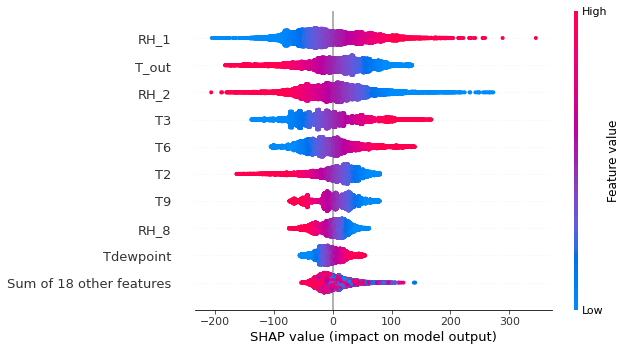

In [ ]:
shap.plots.beeswarm(shap_values)

In [ ]:
# non-numeric dataset that has categorical variables

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/pradmishra1/PublicDatasets/main/automobile.csv')

In [ ]:
df.head(3)

Price          Make Location  Age  Odometer FuelType Transmission  \
0   1.75  marutiwagonr   Mumbai   10     72000      CNG       Manual   
1  12.50  hyundaicreta     Pune    5     41000   Diesel       Manual   
2   4.50     hondajazz  Chennai    9     46000   Petrol       Manual   

  OwnerType Mileage EngineCC PowerBhp  
0     First    26.6      998    58.16  
1     First   19.67     1582    126.2  
2     First    18.2     1199     88.7

In [ ]:
df.columns

Index(['Price', 'Make', 'Location', 'Age', 'Odometer', 'FuelType',
       'Transmission', 'OwnerType', 'Mileage', 'EngineCC', 'PowerBhp'],
      dtype='object')

In [ ]:
df_t = pd.read_csv('https://raw.githubusercontent.com/pradmishra1/PublicDatasets/main/Automobile_transformed.csv')

In [ ]:
del df_t['Unnamed: 0']
df_t.head(3)

Price  Age  Odometer  mileage  engineCC  powerBhp  Location_Bangalore  \
0   1.75   10     72000    26.60     998.0     58.16                   0   
1  12.50    5     41000    19.67    1582.0    126.20                   0   
2   4.50    9     46000    18.20    1199.0     88.70                   0   

   Location_Chennai  Location_Coimbatore  Location_Delhi  ...  \
0                 0                    0               0  ...   
1                 0                    0               0  ...   
2                 1                    0               0  ...   

   Location_Mumbai  Location_Pune  FuelType_Diesel  FuelType_Electric  \
0                1              0                0                  0   
1                0              1                1                  0   
2                0              0                0                  0   

   FuelType_LPG  FuelType_Petrol  Transmission_Manual  \
0             0                0                    1   
1             0                0                    1   
2             0                1                    1   

   OwnerType_Fourth +ACY- Above  OwnerType_Second  OwnerType_Third  
0                             0                 0                0  
1                             0                 0                0  
2                             0                 0                0  

[3 rows x 24 columns]

In [ ]:
df_t.columns

Index(['Price', 'Age', 'Odometer', 'mileage', 'engineCC', 'powerBhp',
       'Location_Bangalore', 'Location_Chennai', 'Location_Coimbatore',
       'Location_Delhi', 'Location_Hyderabad', 'Location_Jaipur',
       'Location_Kochi', 'Location_Kolkata', 'Location_Mumbai',
       'Location_Pune', 'FuelType_Diesel', 'FuelType_Electric', 'FuelType_LPG',
       'FuelType_Petrol', 'Transmission_Manual',
       'OwnerType_Fourth +ACY- Above', 'OwnerType_Second', 'OwnerType_Third'],
      dtype='object')

In [ ]:
#y is the dependent variable, that we need to predict
y = df_t.pop('Price')
# X is the set of input features
X = df_t

In [ ]:
import pandas as pd
import shap
import sklearn

# a simple linear model initialized
model = sklearn.linear_model.LinearRegression()

# linear regression model trained
model.fit(X, y)

LinearRegression()

In [ ]:
print("Model coefficients:\n")
for i in range(X.shape[1]):
    print(X.columns[i], "=", model.coef_[i].round(5))

Model coefficients:

Age = -0.92281
Odometer = 0.0
mileage = -0.07923
engineCC = -4e-05
powerBhp = 0.1356
Location_Bangalore = 2.00658
Location_Chennai = 0.94944
Location_Coimbatore = 2.23592
Location_Delhi = -0.29837
Location_Hyderabad = 1.8771
Location_Jaipur = 0.8738
Location_Kochi = 0.03311
Location_Kolkata = -0.86024
Location_Mumbai = -0.81593
Location_Pune = 0.33843
FuelType_Diesel = -1.2545
FuelType_Electric = 7.03139
FuelType_LPG = 0.79077
FuelType_Petrol = -2.8691
Transmission_Manual = -2.92415
OwnerType_Fourth +ACY- Above = 1.7104
OwnerType_Second = -0.55923
OwnerType_Third = 0.76687


In [ ]:
# compute the SHAP values for the linear model
explainer = shap.Explainer(model.predict, X)

# SHAP value calculation
shap_values = explainer(X)

Permutation explainer: 6020it [05:14, 18.59it/s]


In [ ]:
import numpy as np
pd.DataFrame(np.round(shap_values.values,3)).head(3)

0      1      2      3      4     5      6      7      8      9   ...  \
0 -3.700  0.006 -0.738  0.031 -9.077 -0.04 -0.066 -0.246  0.027 -0.225  ...   
1  0.914 -0.006 -0.188  0.009  0.149 -0.04 -0.066 -0.246  0.027 -0.225  ...   
2 -2.778 -0.004 -0.072  0.023 -4.936 -0.04  0.883 -0.246  0.027 -0.225  ...   

      13     14     15   16   17     18     19   20     21     22  
0 -0.653 -0.020  0.765  0.0  0.0  1.119 -0.965  0.0  0.095 -0.008  
1  0.163  0.318 -0.489  0.0  0.0  1.119 -0.965  0.0  0.095 -0.008  
2  0.163 -0.020  0.765  0.0  0.0 -1.750 -0.965  0.0  0.095 -0.008  

[3 rows x 23 columns]

In [ ]:
# average prediction value is called as the base value
pd.DataFrame(np.round(shap_values.base_values,3)).head(3)

0
0  11.933
1  11.933
2  11.933

In [ ]:
pd.DataFrame(np.round(shap_values.data,3)).head(3)

0        1      2       3       4    5    6    7    8    9   ...   13  \
0  10.0  72000.0  26.60   998.0   58.16  0.0  0.0  0.0  0.0  0.0  ...  1.0   
1   5.0  41000.0  19.67  1582.0  126.20  0.0  0.0  0.0  0.0  0.0  ...  0.0   
2   9.0  46000.0  18.20  1199.0   88.70  0.0  1.0  0.0  0.0  0.0  ...  0.0   

    14   15   16   17   18   19   20   21   22  
0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  
1  1.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  
2  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  

[3 rows x 23 columns]

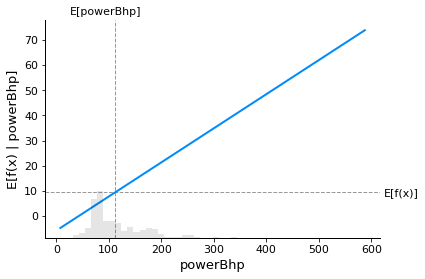

In [ ]:
shap.partial_dependence_plot(
    "powerBhp", model.predict, X, ice=False,
    model_expected_value=True, feature_expected_value=True
)

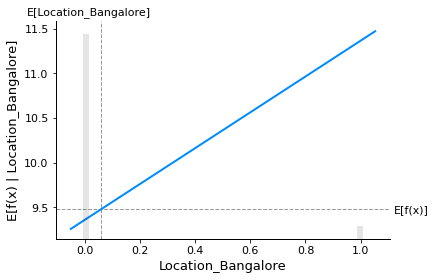

In [ ]:
shap.partial_dependence_plot(
    "Location_Bangalore", model.predict, X, ice=False,
    model_expected_value=True, feature_expected_value=True
)

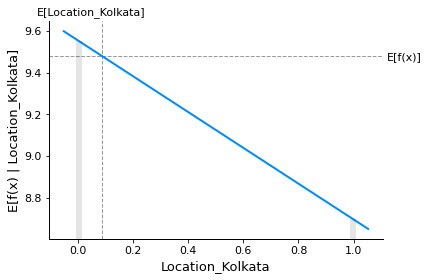

In [ ]:
shap.partial_dependence_plot(
    "Location_Kolkata", model.predict, X, ice=False,
    model_expected_value=True, feature_expected_value=True
)

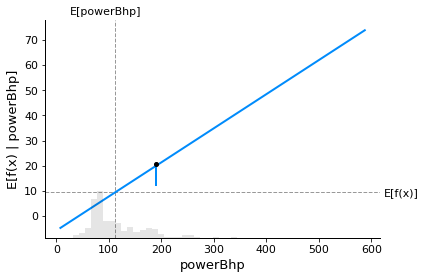

In [ ]:
# make a standard partial dependence plot for lights on predicted output
sample_ind = 20 #20th record from the dataset
shap.partial_dependence_plot(
    "powerBhp", model.predict, X, model_expected_value=True,
    feature_expected_value=True, ice=False,
    shap_values=shap_values[sample_ind:sample_ind+1,:]
)

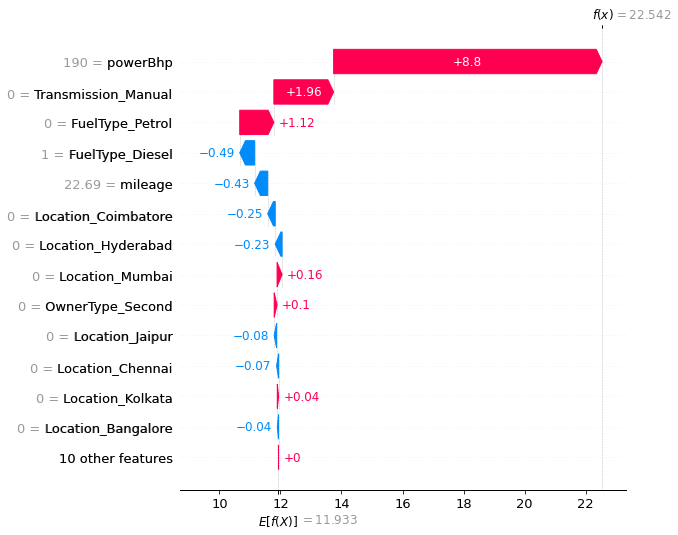

In [ ]:
# the waterfall_plot shows how we get from shap_values.base_values to model.predict(X)[sample_ind]
shap.plots.waterfall(shap_values[sample_ind], max_display=14)

In [ ]:
X[20:21]

Age  Odometer  mileage  engineCC  powerBhp  Location_Bangalore  \
20    6     32982    22.69    1995.0     190.0                   0   

    Location_Chennai  Location_Coimbatore  Location_Delhi  Location_Hyderabad  \
20                 0                    0               0                   0   

    ...  Location_Mumbai  Location_Pune  FuelType_Diesel  FuelType_Electric  \
20  ...                0              0                1                  0   

    FuelType_LPG  FuelType_Petrol  Transmission_Manual  \
20             0                0                    0   

    OwnerType_Fourth +ACY- Above  OwnerType_Second  OwnerType_Third  
20                             0                 0                0  

[1 rows x 23 columns]

In [ ]:
model.predict(X[20:21])

array([22.54213017])

In [ ]:
#computing shap importance values for the linear model
import numpy as np
# feature names from the training data
feature_names = shap_values.feature_names
#combining the shap values with feature names
shap_df = pd.DataFrame(shap_values.values, columns=feature_names)
#taking the absolute shap values
vals = np.abs(shap_df.values).mean(0)
#creating a dataframe view
shap_importance = pd.DataFrame(list(zip(feature_names, vals)), columns=['col_name', 'feature_importance_vals'])
#sorting the importance values
shap_importance.sort_values(by=['feature_importance_vals'], ascending=False, inplace=True)

In [ ]:
print(shap_importance)

                        col_name  feature_importance_vals
4                       powerBhp                 6.057831
0                            Age                 2.338342
18               FuelType_Petrol                 1.406920
19           Transmission_Manual                 1.249077
15               FuelType_Diesel                 0.618288
7            Location_Coimbatore                 0.430233
9             Location_Hyderabad                 0.401118
2                        mileage                 0.270872
13               Location_Mumbai                 0.227442
5             Location_Bangalore                 0.154706
21              OwnerType_Second                 0.154429
6               Location_Chennai                 0.133476
10               Location_Jaipur                 0.127807
12              Location_Kolkata                 0.111829
14                 Location_Pune                 0.051082
8                 Location_Delhi                 0.049372
22            

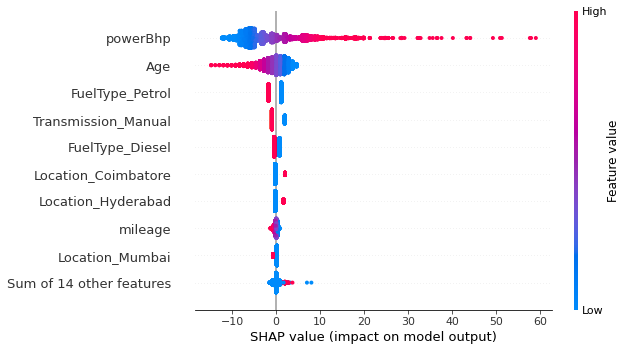

In [ ]:
shap.plots.beeswarm(shap_values)

In [ ]:
import pandas as pd
df_lin_reg = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00374/energydata_complete.csv')
del df_lin_reg['date']
#y is the dependent variable, that we need to predict
y = df_lin_reg.pop('Appliances')
# X is the set of input features
X = df_lin_reg

In [ ]:
import pandas as pd
import shap
import sklearn
#create standardized features
scaler = sklearn.preprocessing.StandardScaler()
scaler.fit(X)
#transform the dataset
X_std = scaler.transform(X)
# a simple linear model initialized
model = sklearn.linear_model.LinearRegression()

# linear regression model trained
model.fit(X_std, y)

LinearRegression()

In [ ]:
print("Model coefficients:\n")
for i in range(X.shape[1]):
    print(X.columns[i], "=", model.coef_[i].round(5))

Model coefficients:

lights = 15.7899
T1 = -0.96962
RH_1 = 60.29926
T2 = -38.82785
RH_2 = -54.8622
T3 = 50.96675
RH_3 = 16.02699
T4 = -7.07893
RH_4 = -0.77668
T5 = -0.05136
RH_5 = 1.27172
T6 = 43.3997
RH_6 = 8.96929
T7 = 3.78656
RH_7 = -7.92521
T8 = 15.93559
RH_8 = -24.39546
T9 = -31.97757
RH_9 = -3.74049
T_out = -54.38609
Press_mm_hg = 1.03483
RH_out = -15.85058
Windspeed = 4.17588
Visibility = 1.81258
Tdewpoint = 21.17741
rv1 = -0.30118
rv2 = -0.30118


In [ ]:
# compute the SHAP values for the linear model
explainer = shap.Explainer(model.predict, X_std)

# SHAP value calculation
shap_values = explainer(X_std)


Permutation explainer: 19736it [08:53, 36.22it/s]


In [ ]:
#computing shap importance values for the linear model
import numpy as np
# feature names from the training data
feature_names = shap_values.feature_names
#combining the shap values with feature names
shap_df = pd.DataFrame(shap_values.values, columns=feature_names)
#taking the absolute shap values
vals = np.abs(shap_df.values).mean(0)
#creating a dataframe view
shap_importance = pd.DataFrame(list(zip(feature_names, vals)), columns=['col_name', 'feature_importance_vals'])
#sorting the importance values
shap_importance.sort_values(by=['feature_importance_vals'], ascending=False, inplace=True)

In [ ]:
print(shap_importance)

      col_name  feature_importance_vals
2    Feature 2                49.530061
19  Feature 19                43.828847
4    Feature 4                42.911069
5    Feature 5                41.671587
11  Feature 11                34.653893
3    Feature 3                31.097282
17  Feature 17                26.607721
16  Feature 16                19.920029
24  Feature 24                17.443688
21  Feature 21                13.044643
6    Feature 6                13.042064
15  Feature 15                12.803450
0    Feature 0                11.907603
12  Feature 12                 7.806188
14  Feature 14                 6.578015
7    Feature 7                 5.866801
22  Feature 22                 3.361895
13  Feature 13                 3.182072
18  Feature 18                 3.041144
23  Feature 23                 1.385616
10  Feature 10                 0.855398
20  Feature 20                 0.823456
1    Feature 1                 0.765753
8    Feature 8                 0.642723


In [ ]:
!pip install lime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 275 kB 3.9 MB/s 
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283857 sha256=0c51177c8d8714d1992c079d079d923526ffa1d5de40d71005c6431cf5714bd2
  Stored in directory: /root/.cache/pip/wheels/ca/cb/e5/ac701e12d365a08917bf4c6171c0961bc880a8181359c66aa7
Successfully built lime


In [ ]:
import lime
import lime.lime_tabular

explainer = lime.lime_tabular.LimeTabularExplainer(np.array(X),
                                                   mode='regression',
                                                  feature_names=X.columns,
                                                  class_names=['price'],
                                                  verbose=True)

In [ ]:
explainer.feature_selection

'auto'

In [ ]:
# asking for explanation for LIME model
i = 60
exp = explainer.explain_instance(np.array(X)[i],
                                 model.predict, 
                                 num_features=14
                                )


model.predict(X)[60]

X[60:61]

Intercept -142.75931081140854
Prediction_local [-492.87528974]
Right: -585.148657732673


X has feature names, but LinearRegression was fitted without feature names


lights         T1       RH_1     T2   RH_2    T3  RH_3         T4  RH_4  \
60       0  20.566667  46.066667  19.89  44.59  20.2  45.4  20.666667  46.0   

      T5  ...    T9       RH_9  T_out  Press_mm_hg  RH_out  Windspeed  \
60  18.7  ...  17.0  47.826667    4.8        738.9    92.0        4.0   

    Visibility  Tdewpoint        rv1        rv2  
60        40.0        3.6  45.643796  45.643796  

[1 rows x 27 columns]

In [ ]:
exp.show_in_notebook(show_table=True)

In [ ]:
exp.as_list()

[('RH_6 > 83.23', 464.95860873125986),
 ('RH_1 > 43.07', 444.5520820612734),
 ('RH_2 > 43.26', -373.10130212185885),
 ('RH_out > 91.67', -318.85242557316906),
 ('RH_8 > 46.54', -268.93915670002696),
 ('lights <= 0.00', -250.2220287090558),
 ('T3 <= 20.79', -167.06955734678837),
 ('3.67 < T_out <= 6.92', 131.73980385122888),
 ('3.63 < T6 <= 7.30', -103.65788170866274),
 ('T9 <= 18.00', 93.3237211878042),
 ('RH_7 > 39.00', -79.9838215229673),
 ('RH_3 > 41.76', 78.2163751694391),
 ('T8 <= 20.79', -45.00198774806178),
 ('18.79 < T2 <= 20.00', 43.92159150217912)]

In [ ]:
pip install eli5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 216 kB 4.0 MB/s 
     |████████████████████████████████| 133 kB 50.7 MB/s 
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107748 sha256=6a065e0a43ffe010937aed134303819088f1c13a4eefbe271afc699e9fbd1aee
  Stored in directory: /root/.cache/pip/wheels/cc/3c/96/3ead31a8e6c20fc0f1a707fde2e05d49a80b1b4b30096573be
Successfully built eli5
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires Jinja2<3.0,>=2.10.1, but you have jinja2 3.1.2 which is incompatible.


In [ ]:
import eli5

In [ ]:
eli5.show_weights(model,
                 feature_names=list(X.columns))

In [ ]:
eli5.explain_weights(model, feature_names=list(X.columns))

Explanation(estimator='LinearRegression()', description="\nFeatures with largest coefficients.\nCaveats:\n1. Be careful with features which are not\n   independent - weights don't show their importance.\n2. If scale of input features is different then scale of coefficients\n   will also be different, making direct comparison between coefficient values\n   incorrect.\n3. Depending on regularization, rare features sometimes may have high\n   coefficients; this doesn't mean they contribute much to the\n   classification result for most examples.\n", error=None, method='linear model', is_regression=True, targets=[TargetExplanation(target='y', feature_weights=FeatureWeights(pos=[FeatureWeight(feature='<BIAS>', weight=97.69495819609834, std=None, value=None), FeatureWeight(feature='RH_1', weight=60.299255184089716, std=None, value=None), FeatureWeight(feature='T3', weight=50.96674896781281, std=None, value=None), FeatureWeight(feature='T6', weight=43.39970146101679, std=None, value=None), FeatureWeight(feature='Tdewpoint', weight=21.1774074524263, std=None, value=None), FeatureWeight(feature='RH_3', weight=16.02698705168466, std=None, value=None), FeatureWeight(feature='T8', weight=15.935589276226205, std=None, value=None), FeatureWeight(feature='lights', weight=15.789903704584184, std=None, value=None), FeatureWeight(feature='RH_6', weight=8.969287446247623, std=None, value=None), FeatureWeight(feature='Windspeed', weight=4.175883018393839, std=None, value=None), FeatureWeight(feature='T7', weight=3.7865572806064467, std=None, value=None)], neg=[FeatureWeight(feature='RH_2', weight=-54.86220483423181, std=None, value=None), FeatureWeight(feature='T_out', weight=-54.386089940589464, std=None, value=None), FeatureWeight(feature='T2', weight=-38.82784593499372, std=None, value=None), FeatureWeight(feature='T9', weight=-31.97757054676551, std=None, value=None), FeatureWeight(feature='RH_8', weight=-24.39545796548554, std=None, value=None), FeatureWeight(feature='RH_out', weight=-15.850580720568473, std=None, value=None), FeatureWeight(feature='RH_7', weight=-7.925207858944081, std=None, value=None), FeatureWeight(feature='T4', weight=-7.0789313668879394, std=None, value=None), FeatureWeight(feature='RH_9', weight=-3.74049013863407, std=None, value=None)], pos_remaining=3, neg_remaining=5), proba=None, score=None, weighted_spans=None, heatmap=None)], feature_importances=None, decision_tree=None, highlight_spaces=None, transition_features=None, image=None)

In [ ]:
eli5.explain_prediction(model,X.iloc[60])

X has feature names, but LinearRegression was fitted without feature names


Explanation(estimator='LinearRegression()', description=None, error=None, method='linear model', is_regression=True, targets=[TargetExplanation(target='y', feature_weights=FeatureWeights(pos=[FeatureWeight(feature='RH_1', weight=2777.785688813735, std=None, value=46.0666666666667), FeatureWeight(feature='T3', weight=1029.5283291498188, std=None, value=20.2), FeatureWeight(feature='RH_6', weight=832.9478275081963, std=None, value=92.8666666666667), FeatureWeight(feature='Press_mm_hg', weight=764.6368975099249, std=None, value=738.9), FeatureWeight(feature='RH_3', weight=727.6252121464836, std=None, value=45.4), FeatureWeight(feature='T8', weight=305.9633141035431, std=None, value=19.2), FeatureWeight(feature='T6', weight=176.34745360326474, std=None, value=4.06333333333333), FeatureWeight(feature='<BIAS>', weight=97.69495819609834, std=None, value=1.0), FeatureWeight(feature='Tdewpoint', weight=76.2386668287347, std=None, value=3.6), FeatureWeight(feature='Visibility', weight=72.50313872392609, std=None, value=40.0), FeatureWeight(feature='T7', weight=67.61529117402925, std=None, value=17.8566666666667), FeatureWeight(feature='RH_5', weight=63.70043964177717, std=None, value=50.09), FeatureWeight(feature='Windspeed', weight=16.703532073575357, std=None, value=4.0)], neg=[FeatureWeight(feature='RH_2', weight=-2446.3057135583967, std=None, value=44.59), FeatureWeight(feature='RH_out', weight=-1458.2534262922995, std=None, value=92.0), FeatureWeight(feature='RH_8', weight=-1339.310642305156, std=None, value=54.9), FeatureWeight(feature='T2', weight=-772.2858556470251, std=None, value=19.89), FeatureWeight(feature='T9', weight=-543.6186992950137, std=None, value=17.0), FeatureWeight(feature='RH_7', weight=-364.2953879161298, std=None, value=45.9666666666667), FeatureWeight(feature='T_out', weight=-261.0532317148294, std=None, value=4.8), FeatureWeight(feature='RH_9', weight=-178.8951750304056, std=None, value=47.8266666666667), FeatureWeight(feature='T4', weight=-146.29791491568432, std=None, value=20.6666666666667), FeatureWeight(feature='RH_4', weight=-35.72710319926956, std=None, value=46.0), FeatureWeight(feature='T1', weight=-19.941897044464262, std=None, value=20.566666666666695), FeatureWeight(feature='rv1', weight=-13.746971150894161, std=None, value=45.64379621297121), FeatureWeight(feature='rv2', weight=-13.746971150894055, std=None, value=45.64379621297121), FeatureWeight(feature='T5', weight=-0.9604179853179905, std=None, value=18.7)], pos_remaining=0, neg_remaining=0), proba=None, score=-585.1486577326729, weighted_spans=None, heatmap=None)], feature_importances=None, decision_tree=None, highlight_spaces=None, transition_features=None, image=None)

In [ ]:
from eli5.sklearn import PermutationImportance

# a simple linear model initialized
model = sklearn.linear_model.LinearRegression()

# linear regression model trained
model.fit(X, y)

LinearRegression()

In [ ]:
perm = PermutationImportance(model)
perm.fit(X, y)
eli5.show_weights(perm,feature_names=list(X.columns))

In [ ]:
### Explaining a linear logistic regression model

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import confusion_matrix, classification_report

df_train = pd.read_csv('https://raw.githubusercontent.com/pradmishra1/PublicDatasets/main/ChurnData_test.csv')

In [ ]:
from sklearn.preprocessing import LabelEncoder

tras = LabelEncoder()
df_train['area_code_tr'] = tras.fit_transform(df_train['area_code'])
df_train.columns
del df_train['area_code']
df_train.columns
df_train['target_churn_dum'] = pd.get_dummies(df_train.churn,prefix='churn',drop_first=True)
df_train.columns
del df_train['international_plan']
del df_train['voice_mail_plan']
del df_train['churn']
df_train.info()
del df_train['Unnamed: 0']
df_train.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1667 entries, 0 to 1666
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     1667 non-null   int64  
 1   state                          1667 non-null   object 
 2   account_length                 1667 non-null   int64  
 3   number_vmail_messages          1667 non-null   int64  
 4   total_day_minutes              1667 non-null   float64
 5   total_day_calls                1667 non-null   int64  
 6   total_day_charge               1667 non-null   float64
 7   total_eve_minutes              1667 non-null   float64
 8   total_eve_calls                1667 non-null   int64  
 9   total_eve_charge               1667 non-null   float64
 10  total_night_minutes            1667 non-null   float64
 11  total_night_calls              1667 non-null   int64  
 12  total_night_charge             1667 non-null   f

Index(['state', 'account_length', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'area_code_tr', 'target_churn_dum'],
      dtype='object')

In [ ]:
df_train.columns

Index(['state', 'account_length', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'area_code_tr', 'target_churn_dum'],
      dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split

df_train.columns

X = df_train[['account_length', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'area_code_tr']]
Y = df_train['target_churn_dum']

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.20,stratify=Y)
log_model = LogisticRegression()

log_model.fit(xtrain,ytrain)

print("training accuracy:", log_model.score(xtrain,ytrain)) #training accuracy

print("test accuracy:",log_model.score(xtest,ytest)) # test accuracy

training accuracy: 0.8687171792948237
test accuracy: 0.8682634730538922


lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [ ]:
np.round(log_model.coef_,2)

log_model.intercept_

X.columns

Index(['account_length', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'area_code_tr'],
      dtype='object')

In [ ]:
# Provide Probability as Output
def model_churn_proba(x):
    return log_model.predict_proba(x)[:,1]

# Provide Log Odds as Output
def model_churn_log_odds(x):
    p = log_model.predict_log_proba(x)
    return p[:,1] - p[:,0]

In [ ]:
# compute the SHAP values for the linear model
background_churn = shap.maskers.Independent(X, max_samples=2000)
explainer = shap.Explainer(log_model, background_churn,feature_names=list(X.columns))
shap_values_churn = explainer(X)

In [ ]:
shap_values_churn

.values =
array([[-5.68387743e-03,  2.59884057e-01, -1.12707664e+00, ...,
         1.70015539e-04,  6.35113804e-01, -5.98927431e-03],
       [-9.26328584e-02,  2.59884057e-01,  4.31613190e-01, ...,
        -4.82342680e-04, -7.11876922e-01, -5.98927431e-03],
       [-1.05143764e-02, -8.06452301e-01,  1.15736857e+00, ...,
         2.05960486e-03, -2.62880014e-01,  5.88245015e-03],
       ...,
       [ 9.09261014e-02,  2.59884057e-01, -4.15611799e-01, ...,
         1.99211953e-03, -2.62880014e-01, -5.34120777e-05],
       [-2.50058732e-02,  2.59884057e-01,  7.63911460e-02, ...,
        -1.08971068e-03, -7.11876922e-01, -5.98927431e-03],
       [ 3.05448646e-02, -9.90303397e-01, -5.29936135e-01, ...,
        -6.17313346e-04, -7.11876922e-01, -5.34120777e-05]])

.base_values =
array([-2.18079251, -2.18079251, -2.18079251, ..., -2.18079251,
       -2.18079251, -2.18079251])

.data =
array([[101.  ,   0.  ,  70.9 , ...,   2.86,   3.  ,   2.  ],
       [137.  ,   0.  , 223.6 , ...,   2.57,   0

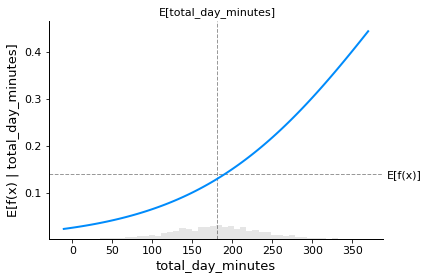

In [ ]:
# make a standard partial dependence plot
sample_ind = 25
fig,ax = shap.partial_dependence_plot(
    "total_day_minutes", model_churn_proba, X, model_expected_value=True,
    feature_expected_value=True, show=False, ice=False
)

In [ ]:
shap_values = pd.DataFrame(shap_values_churn.values)
shap_values.columns = list(X.columns)
shap_values.head(2)

account_length  number_vmail_messages  total_day_minutes  total_day_calls  \
0       -0.005684               0.259884          -1.127077        -0.180561   
1       -0.092633               0.259884           0.431613         0.100345   

   total_day_charge  total_eve_minutes  total_eve_calls  total_eve_charge  \
0         -0.025010           0.018183         0.451987          0.000321   
1          0.009572           0.068239        -0.638957          0.001207   

   total_night_minutes  total_night_calls  total_night_charge  \
0            -0.022797           0.462717           -0.000306   
1             0.065601           0.323251            0.000879   

   total_intl_minutes  total_intl_calls  total_intl_charge  \
0            0.002482          0.116883           0.000170   
1           -0.006955         -0.230278          -0.000482   

   number_customer_service_calls  area_code_tr  
0                       0.635114     -0.005989  
1                      -0.711877     -0.005989

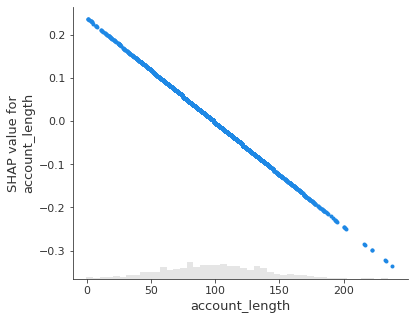

In [ ]:
shap.plots.scatter(shap_values_churn[:,'account_length'])

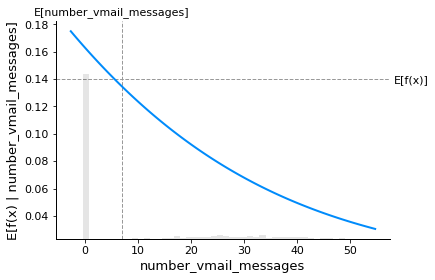

In [ ]:
# make a standard partial dependence plot
sample_ind = 25
fig,ax = shap.partial_dependence_plot(
    "number_vmail_messages", model_churn_proba, X, model_expected_value=True,
    feature_expected_value=True, show=False,ice=False)

In [ ]:
# compute the SHAP values for the linear model
explainer_log_odds = shap.Explainer(log_model, background_churn,feature_names=list(X.columns))
shap_values_churn_log_odds = explainer_log_odds(X)
shap_values_churn_log_odds

.values =
array([[-6.32070787e-03,  2.47316494e-01, -1.13183746e+00, ...,
         1.49704964e-04,  6.21860718e-01, -6.10800224e-03],
       [-9.32696889e-02,  2.47316494e-01,  4.26852365e-01, ...,
        -5.02653256e-04, -7.25130007e-01, -6.10800224e-03],
       [-1.11512068e-02, -8.19019863e-01,  1.15260775e+00, ...,
         2.03929429e-03, -2.76133099e-01,  5.76372223e-03],
       ...,
       [ 9.02892710e-02,  2.47316494e-01, -4.20372625e-01, ...,
         1.97180896e-03, -2.76133099e-01, -1.72140005e-04],
       [-2.56427036e-02,  2.47316494e-01,  7.16303209e-02, ...,
        -1.11002125e-03, -7.25130007e-01, -6.10800224e-03],
       [ 2.99080342e-02, -1.00287096e+00, -5.34696960e-01, ...,
        -6.37623922e-04, -7.25130007e-01, -1.72140005e-04]])

.base_values =
array([-2.16324677, -2.16324677, -2.16324677, ..., -2.16324677,
       -2.16324677, -2.16324677])

.data =
array([[101.  ,   0.  ,  70.9 , ...,   2.86,   3.  ,   2.  ],
       [137.  ,   0.  , 223.6 , ...,   2.57,   0

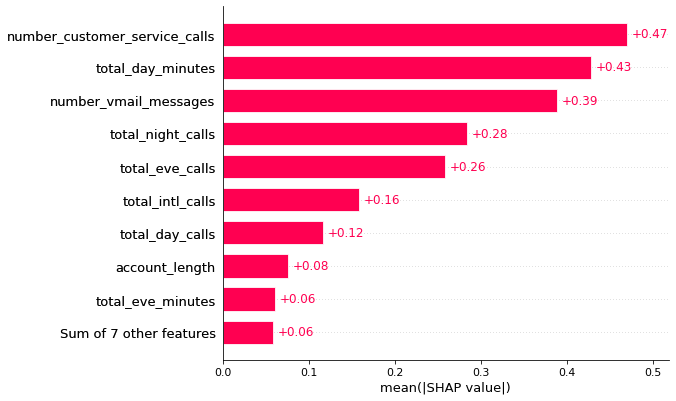

In [ ]:
shap.plots.bar(shap_values_churn_log_odds)

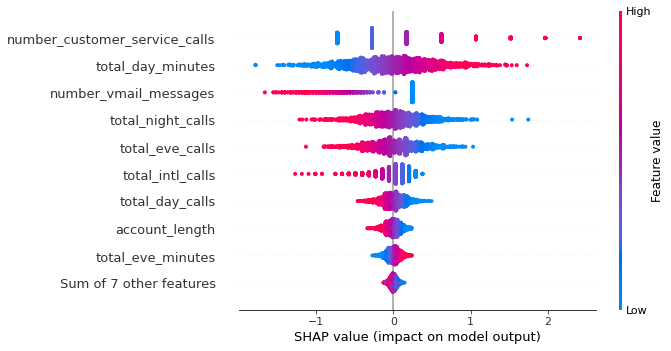

In [ ]:
shap.plots.beeswarm(shap_values_churn_log_odds)

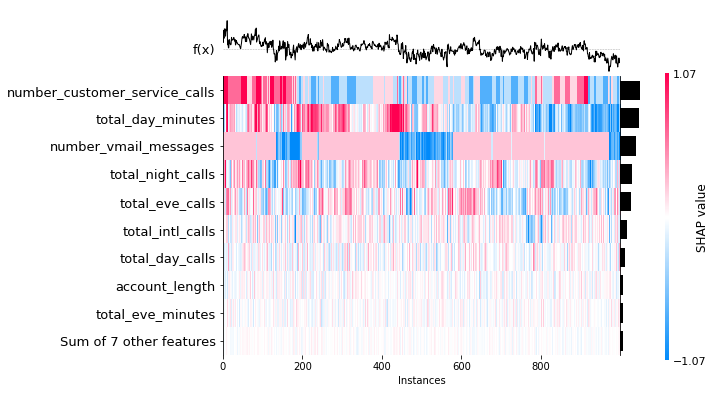

In [ ]:
shap.plots.heatmap(shap_values_churn_log_odds[:1000])

In [ ]:
temp_df = pd.DataFrame()
temp_df['Feature Name'] = pd.Series(X.columns)
temp_df['Coefficients'] = pd.Series(log_model.coef_.flatten())
temp_df.sort_values(by='Coefficients',ascending=False)

Feature Name  Coefficients
14  number_customer_service_calls      0.448997
2               total_day_minutes      0.010208
11             total_intl_minutes      0.008579
13              total_intl_charge      0.002250
5               total_eve_minutes      0.001521
4                total_day_charge      0.001332
7                total_eve_charge      0.000317
10             total_night_charge     -0.000186
8             total_night_minutes     -0.000623
0                  account_length     -0.002415
15                   area_code_tr     -0.005936
3                 total_day_calls     -0.007592
6                 total_eve_calls     -0.016529
9               total_night_calls     -0.017433
1           number_vmail_messages     -0.036770
12               total_intl_calls     -0.086790

In [ ]:
import lime
import lime.lime_tabular

explainer = lime.lime_tabular.LimeTabularExplainer(np.array(xtrain),
                    feature_names=list(xtrain.columns), 
                    class_names=['target_churn_dum'], 
                    verbose=True, mode='classification')

In [ ]:
# this record is a no churn scenario
exp = explainer.explain_instance(xtest.iloc[0], log_model.predict_proba, num_features=16)
exp.as_list()

Intercept -0.005325152786766457
Prediction_local [0.38147987]
Right: 0.32177492114146566


X does not have valid feature names, but LogisticRegression was fitted with feature names


[('number_customer_service_calls > 2.00', 0.1530891322197175),
 ('total_day_minutes > 213.80', 0.11114575899827552),
 ('number_vmail_messages <= 0.00', 0.09610037835765535),
 ('total_intl_calls <= 3.00', 0.03177016778340472),
 ('total_day_calls <= 86.00', 0.029375047698073507),
 ('99.00 < total_night_calls <= 113.00', -0.023964881054121437),
 ('account_length > 126.00', -0.015756474385902122),
 ('88.00 < total_eve_calls <= 101.00', 0.008756083756550214),
 ('total_intl_minutes <= 8.60', -0.007205495334049559),
 ('200.00 < total_eve_minutes <= 232.00', 0.004122691218360631),
 ('total_intl_charge <= 2.32', -0.0013747713519713068),
 ('total_day_charge > 36.35', 0.0010811737941700244),
 ('200.20 < total_night_minutes <= 234.80', -0.00013400510199346275),
 ('0.00 < area_code_tr <= 1.00', -8.127174069198377e-05),
 ('9.01 < total_night_charge <= 10.57', -6.668417986225894e-05),
 ('17.00 < total_eve_charge <= 19.72', -5.18320207196282e-05)]

In [ ]:
pd.DataFrame(exp.as_list())

0         1
0     number_customer_service_calls > 2.00  0.153089
1               total_day_minutes > 213.80  0.111146
2            number_vmail_messages <= 0.00  0.096100
3                 total_intl_calls <= 3.00  0.031770
4                 total_day_calls <= 86.00  0.029375
5      99.00 < total_night_calls <= 113.00 -0.023965
6                  account_length > 126.00 -0.015756
7        88.00 < total_eve_calls <= 101.00  0.008756
8               total_intl_minutes <= 8.60 -0.007205
9     200.00 < total_eve_minutes <= 232.00  0.004123
10               total_intl_charge <= 2.32 -0.001375
11                total_day_charge > 36.35  0.001081
12  200.20 < total_night_minutes <= 234.80 -0.000134
13             0.00 < area_code_tr <= 1.00 -0.000081
14      9.01 < total_night_charge <= 10.57 -0.000067
15       17.00 < total_eve_charge <= 19.72 -0.000052

In [ ]:
exp.show_in_notebook(show_table=True)

In [ ]:
# This is s churn scenario
exp = explainer.explain_instance(xtest.iloc[20], log_model.predict_proba, num_features=16)
exp.as_list()

Intercept -0.02171544428872446
Prediction_local [0.44363396]
Right: 0.4309152994720991


X does not have valid feature names, but LogisticRegression was fitted with feature names


[('number_customer_service_calls > 2.00', 0.15255665525554568),
 ('total_day_minutes > 213.80', 0.11572355524257688),
 ('number_vmail_messages <= 0.00', 0.09656802173637159),
 ('total_night_calls <= 86.00', 0.07347814323553245),
 ('total_day_calls <= 86.00', 0.03143722302975322),
 ('total_eve_minutes <= 166.20', -0.016279347282555784),
 ('88.00 < total_eve_calls <= 101.00', 0.01202796623602075),
 ('4.00 < total_intl_calls <= 5.00', -0.008862308197327355),
 ('72.00 < account_length <= 98.00', 0.008095316213066618),
 ('total_intl_minutes > 12.00', 0.004036225959225672),
 ('200.20 < total_night_minutes <= 234.80', 0.0031930707578459207),
 ('total_intl_charge > 3.24', -0.0025561403383019586),
 ('total_day_charge > 36.35', -0.0021799602467677667),
 ('9.01 < total_night_charge <= 10.57', -0.001598247181850764),
 ('total_eve_charge <= 14.13', -0.001066803177182677),
 ('area_code_tr > 1.00', 0.0007760299764712853)]

In [ ]:
exp.show_in_notebook(show_table=True)

In [ ]:
eli5.show_weights(log_model,
                 feature_names=list(xtrain.columns))

In [ ]:
eli5.explain_weights(log_model, feature_names=list(xtrain.columns))

Explanation(estimator='LogisticRegression()', description="\nFeatures with largest coefficients.\nCaveats:\n1. Be careful with features which are not\n   independent - weights don't show their importance.\n2. If scale of input features is different then scale of coefficients\n   will also be different, making direct comparison between coefficient values\n   incorrect.\n3. Depending on regularization, rare features sometimes may have high\n   coefficients; this doesn't mean they contribute much to the\n   classification result for most examples.\n", error=None, method='linear model', is_regression=False, targets=[TargetExplanation(target=1, feature_weights=FeatureWeights(pos=[FeatureWeight(feature='number_customer_service_calls', weight=0.44899690859275704, std=None, value=None), FeatureWeight(feature='total_day_minutes', weight=0.010207529988965453, std=None, value=None), FeatureWeight(feature='total_intl_minutes', weight=0.00857903129105957, std=None, value=None), FeatureWeight(feature='total_intl_charge', weight=0.0022495111017124102, std=None, value=None), FeatureWeight(feature='total_eve_minutes', weight=0.001521464553773795, std=None, value=None), FeatureWeight(feature='total_day_charge', weight=0.0013321227041845347, std=None, value=None), FeatureWeight(feature='total_eve_charge', weight=0.0003165166436189373, std=None, value=None)], neg=[FeatureWeight(feature='total_intl_calls', weight=-0.08679024981804608, std=None, value=None), FeatureWeight(feature='number_vmail_messages', weight=-0.03677021922200852, std=None, value=None), FeatureWeight(feature='<BIAS>', weight=-0.034330033749750626, std=None, value=None), FeatureWeight(feature='total_night_calls', weight=-0.01743318100922411, std=None, value=None), FeatureWeight(feature='total_eve_calls', weight=-0.016529445273356536, std=None, value=None), FeatureWeight(feature='total_day_calls', weight=-0.0075920560381587876, std=None, value=None), FeatureWeight(feature='area_code_tr', weight=-0.0059358622319080215, std=None, value=None), FeatureWeight(feature='account_length', weight=-0.0024152494718437, std=None, value=None), FeatureWeight(feature='total_night_minutes', weight=-0.0006234028777346386, std=None, value=None), FeatureWeight(feature='total_night_charge', weight=-0.00018572894800819586, std=None, value=None)], pos_remaining=0, neg_remaining=0), proba=None, score=None, weighted_spans=None, heatmap=None)], feature_importances=None, decision_tree=None, highlight_spaces=None, transition_features=None, image=None)

In [ ]:
eli5.explain_prediction(log_model,xtrain.iloc[60])

Explanation(estimator='LogisticRegression()', description=None, error=None, method='linear model', is_regression=False, targets=[TargetExplanation(target=0, feature_weights=FeatureWeights(pos=[FeatureWeight(feature='total_night_calls', weight=2.4580785223005996, std=None, value=141.0), FeatureWeight(feature='total_eve_calls', weight=1.2892967313218098, std=None, value=78.0), FeatureWeight(feature='total_day_calls', weight=0.6984691555106085, std=None, value=92.0), FeatureWeight(feature='account_length', weight=0.30432143345230617, std=None, value=126.0), FeatureWeight(feature='total_intl_calls', weight=0.17358049963609215, std=None, value=2.0), FeatureWeight(feature='total_night_minutes', weight=0.1268001453312255, std=None, value=203.4), FeatureWeight(feature='<BIAS>', weight=0.034330033749750626, std=None, value=1.0), FeatureWeight(feature='area_code_tr', weight=0.0059358622319080215, std=None, value=1.0), FeatureWeight(feature='total_night_charge', weight=0.0016994198742749922, std=None, value=9.15)], neg=[FeatureWeight(feature='total_day_minutes', weight=-2.8989385168661888, std=None, value=284.0), FeatureWeight(feature='number_customer_service_calls', weight=-0.44899690859275704, std=None, value=1.0), FeatureWeight(feature='total_eve_minutes', weight=-0.30383647138862685, std=None, value=199.7), FeatureWeight(feature='total_day_charge', weight=-0.06431488415802934, std=None, value=48.28), FeatureWeight(feature='total_intl_minutes', weight=-0.056621606520993156, std=None, value=6.6), FeatureWeight(feature='total_eve_charge', weight=-0.0053712874422133655, std=None, value=16.97), FeatureWeight(feature='total_intl_charge', weight=-0.00400412976104809, std=None, value=1.78)], pos_remaining=0, neg_remaining=0), proba=0.7875847667304425, score=-1.3104279986787188, weighted_spans=None, heatmap=None)], feature_importances=None, decision_tree=None, highlight_spaces=None, transition_features=None, image=None)

In [ ]:
from eli5.sklearn import PermutationImportance

In [ ]:
perm = PermutationImportance(log_model)
perm.fit(xtest, ytest)
eli5.show_weights(perm,feature_names=list(xtrain.columns))